In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [16]:
mesures_normees = pd.read_csv("../preprocessing/donnees_mesures_PM2_5.csv",sep=';')
env_normees = pd.read_csv("../preprocessing/donnees_environnement_capteurs.csv",sep=';')

In [17]:
Capteurs = mesures_normees['Capteurs']
env_normees = mesures_normees.drop(env_normees.columns[0], axis=1)
env_normees

KeyError: 'Capteurs'

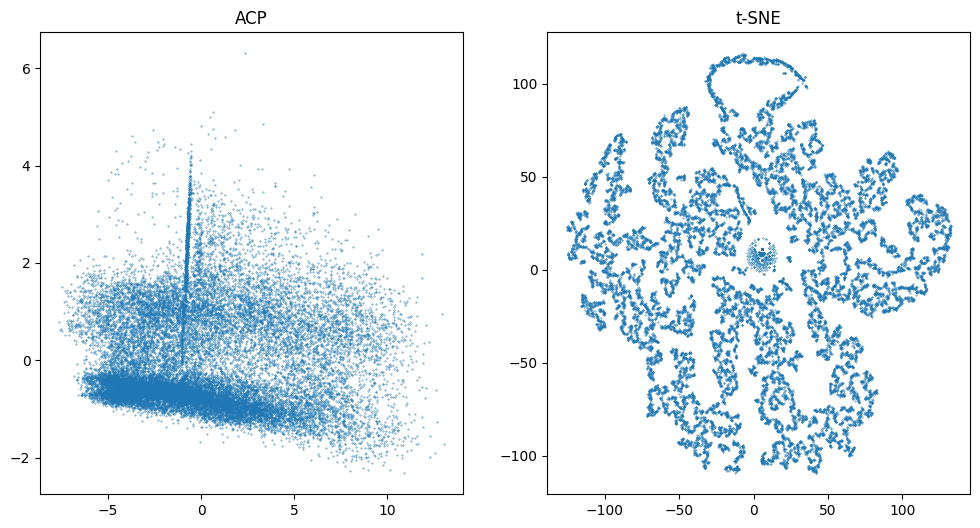

In [15]:
# pca = PCA(n_components=2)
# mesures_acp = pca.fit_transform(mesures_normees)
# tsne = TSNE(n_components=2, random_state=42)
# mesures_tsne = tsne.fit_transform(mesures_acp)

# plt.figure(figsize=(12, 6))

# # Nuage de points de l'ACP
# plt.subplot(1, 2, 1)
# plt.scatter(mesures_acp[:, 0], mesures_acp[:, 1],s=0.1)
# plt.title("ACP")

# # Nuage de points t-SNE
# plt.subplot(1, 2, 2)
# plt.scatter(mesures_tsne[:, 0], mesures_tsne[:, 1],s=0.1)
# plt.title("t-SNE")

# plt.show()


